## Step 1: Reading and Understanding the Data



In [9]:
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

In [10]:
rent_bike = pd.read_csv("day.csv")

In [11]:
# Check the head of the dataset
rent_bike.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [7]:
rent_bike.shape

(730, 16)

In [8]:
rent_bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [574]:
# instant just a index showing number of data points in the dataset
# So lets drop the varibae 'instant' since it is not significant in predicting the demand for shared bikes.
rent_bike.drop(['instant'],axis = 1, inplace = True)
rent_bike.head()

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [575]:
# lets drop this variable because day alone may not be useful in predicting the demand for shared bikes.
rent_bike.drop(['dteday'],axis = 1, inplace = True)
rent_bike.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [576]:
# 3) season : season (1:spring, 2:summer, 3:fall, 4:winter)
rent_bike.season.value_counts()

3    188
2    184
1    180
4    178
Name: season, dtype: int64

#### We have season column having values ranging from 1 to 4, so lets map these values as given in data dictionary
- 1:spring, 2:summer, 3:fall, 4:winter

In [577]:
# Mapping of values to season
rent_bike['season'] = rent_bike['season'].map({1:'spring', 2:'summer', 3:'fall', 4:'winter'})
# Lets check the dataset for updated values
rent_bike.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,spring,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,spring,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,spring,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,spring,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,spring,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [578]:
# yr : year (0: 2018, 1:2019)
rent_bike.yr.value_counts()

1    365
0    365
Name: yr, dtype: int64

#### yr column having values ranging from 0 & 1, so lets map these values as given in data dictionary
- 0:2018 & 1:2019

In [579]:
#  mnth : month ( 1 to 12)
rent_bike.mnth.value_counts()

12    62
10    62
8     62
7     62
5     62
3     62
1     62
11    60
9     60
6     60
4     60
2     56
Name: mnth, dtype: int64

#### variable 'mnth' values ranging from 1 to 12, so lets map these values from January to December.
- 1:January, 2:February, 3:March, 4:April, 5:May, 6:June, 7:July, 8:August,9:September, 10:October, 11:November, 12:December

In [580]:
# Mapping of variable mnth
rent_bike['mnth'] = rent_bike['mnth'].map({1:'January', 2:'February', 3:'March', 4:'April', 5:'May', 6:'June', 7:'July', 8:'August',9:'September', 10:'October', 11:'November', 12:'December'})
# Lets check the dataset for updated values
rent_bike.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,spring,0,January,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,spring,0,January,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,spring,0,January,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,spring,0,January,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,spring,0,January,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [581]:
# 6) holiday : weather day is a holiday or not
rent_bike.holiday.value_counts()

0    709
1     21
Name: holiday, dtype: int64

#### variable 'holiday' values are 0 & 1
- We can see that on January 1, 2018: New Year’s Day, the day is Monday & it is a holiday. So lets map 0 & 1 as
- 0:holiday, 1:not holiday

In [582]:
# weekday : day of the week
rent_bike.weekday.value_counts()

6    105
1    105
0    105
5    104
4    104
2    104
3    103
Name: weekday, dtype: int64

####  variable 'weekday' values are 0 to 6, and data dictionary says it is day of the week
- there are days of the week i.e. Sunday to Saturday
- Lets check the next column 'workingday' to get more insights for the week's day

In [583]:
# workingday : if day is neither weekend nor holiday is 1, otherwise is 0.
rent_bike.workingday.value_counts()

1    499
0    231
Name: workingday, dtype: int64

####  variable 'workingday' values are 0 & 1, and data dictionary says 
- if day is neither weekend nor holiday is 1, otherwise is 0, so 0 indicates either weekend/holiday & 1 indicates working day
- So if we see from the dataset, workingday = 0 corresponding to weekday = 0 & 6 only. From this we can made conclusion that
- 0 & 6 are the weekends & 1 to 5 are weekdays

#### Now again see the variable 'weekday' & we know 0 & 6 are the weekends & 1 to 5 are weekdays 
- We can map 0 to 6 as from Sunday to Saturday, where 0 = Sunday & 6 = Saturday

In [584]:
# Mapping of variable 'weekday'
rent_bike['weekday'] = rent_bike['weekday'].map({0:'Sunday', 1:'Monday',2:'Tuesday', 3:'Wednesday',4:'Thrusday', 5:'Friday',6:'Saturday'})
# Lets check the dataset for updated values
rent_bike.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,spring,0,January,0,Saturday,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,spring,0,January,0,Sunday,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,spring,0,January,0,Monday,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,spring,0,January,0,Tuesday,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,spring,0,January,0,Wednesday,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [585]:
# 9) weathersit :
rent_bike.weathersit.value_counts()

1    463
2    246
3     21
Name: weathersit, dtype: int64

#### Now again see the variable 'weathersit' from the data dictionary we have 
- 1: Clear, Few clouds, Partly cloudy, Partly cloudy
- 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
- 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
- 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
- Lets map all these values with smaller discriptions as below

In [586]:
# Mapping of variable 'weathersit'
rent_bike['weathersit'] = rent_bike['weathersit'].map({1:'Clear', 2:'Mist',3:'Light Snow', 4:'Heavyrain'})
# Lets check the dataset for updated values
rent_bike.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,spring,0,January,0,Saturday,0,Mist,14.110847,18.18125,80.5833,10.749882,331,654,985
1,spring,0,January,0,Sunday,0,Mist,14.902598,17.68695,69.6087,16.652113,131,670,801
2,spring,0,January,0,Monday,1,Clear,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,spring,0,January,0,Tuesday,1,Clear,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,spring,0,January,0,Wednesday,1,Clear,9.305237,11.46350,43.6957,12.522300,82,1518,1600


#### The variables 'temp' & 'atemp' from the data dictionary we have
- temp : temperature in Celsius
- atemp: feeling temperature in Celsius

In [587]:
# Lets check the correalation between the variables 'temp' & 'atemp'
temperature = ['temp','atemp']
pd.DataFrame(np.corrcoef(rent_bike['temp'],rent_bike['atemp']), index=temperature, columns=temperature)

,temp,atemp
temp,1.000000,0.991696
atemp,0.991696,1.000000


#### From the above obervation, since both the variables are highly correlated. We can drop one of them

In [588]:
# 10) Dropping the variable 'temp'
rent_bike = rent_bike.drop(columns=['temp'])
# Lets check the dataset for updated values
rent_bike.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,atemp,hum,windspeed,casual,registered,cnt
0,spring,0,January,0,Saturday,0,Mist,18.18125,80.5833,10.749882,331,654,985
1,spring,0,January,0,Sunday,0,Mist,17.68695,69.6087,16.652113,131,670,801
2,spring,0,January,0,Monday,1,Clear,9.47025,43.7273,16.636703,120,1229,1349
3,spring,0,January,0,Tuesday,1,Clear,10.60610,59.0435,10.739832,108,1454,1562
4,spring,0,January,0,Wednesday,1,Clear,11.46350,43.6957,12.522300,82,1518,1600


In [589]:
# 10) atemp :
rent_bike.atemp.describe()

count    730.000000
mean      23.726322
std        8.150308
min        3.953480
25%       16.889713
50%       24.368225
75%       30.445775
max       42.044800
Name: atemp, dtype: float64

#### From the above observation, it seems that the values are within valid range.

In [590]:
# 11) hum: humidity
rent_bike.hum.describe()

count    730.000000
mean      62.765175
std       14.237589
min        0.000000
25%       52.000000
50%       62.625000
75%       72.989575
max       97.250000
Name: hum, dtype: float64

In [591]:
rent_bike.hum.sort_values()

68      0.0000
49     18.7917
461    25.4167
462    27.5833
450    29.0000
        ...   
64     94.8261
339    94.9583
325    96.2500
340    97.0417
265    97.2500
Name: hum, Length: 730, dtype: float64

#### From the above observation, value '0' is present in the dataset which is not a valid practically for the humidity.
- So lets impute the 0 value with mean/median. In our case mean & median are almost the same.

In [592]:
# 12) windspeed: wind speed
rent_bike.windspeed.describe()

count    730.000000
mean      12.763620
std        5.195841
min        1.500244
25%        9.041650
50%       12.125325
75%       15.625589
max       34.000021
Name: windspeed, dtype: float64

#### From the above observation, now the all values seems practically okay for the windspeed.

### From the data dictionary, we have
- casual: count of casual users
- registered: count of registered users
- cnt: count of total rental bikes including both casual and registered

#### Since our aim is to predict target variable 'cnt' and 'cnt' consist of 'casual' & 'registered'.
#### Lets drop the both the variables 'casual' & 'registered'

In [593]:
rent_bike = rent_bike.drop(columns=['casual','registered'])

In [594]:
rent_bike

,season,yr,mnth,holiday,weekday,workingday,weathersit,atemp,hum,windspeed,cnt
0,spring,0,January,0,Saturday,0,Mist,18.18125,80.5833,10.749882,985
1,spring,0,January,0,Sunday,0,Mist,17.68695,69.6087,16.652113,801
2,spring,0,January,0,Monday,1,Clear,9.47025,43.7273,16.636703,1349
3,spring,0,January,0,Tuesday,1,Clear,10.60610,59.0435,10.739832,1562
4,spring,0,January,0,Wednesday,1,Clear,11.46350,43.6957,12.522300,1600
...,...,...,...,...,...,...,...,...,...,...,...
725,spring,1,December,0,Thrusday,1,Mist,11.33210,65.2917,23.458911,2114
726,spring,1,December,0,Friday,1,Mist,12.75230,59.0000,10.416557,3095
727,spring,1,December,0,Saturday,0,Mist,12.12000,75.2917,8.333661,1341
728,spring,1,December,0,Sunday,0,Clear,11.58500,48.3333,23.500518,1796


## Step 2: Visualising the Data
#### We'll visualise our data using matplotlib and seaborn

In [595]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#### Visualising Numeric Variables

Let's make a pairplot of all the numeric variables

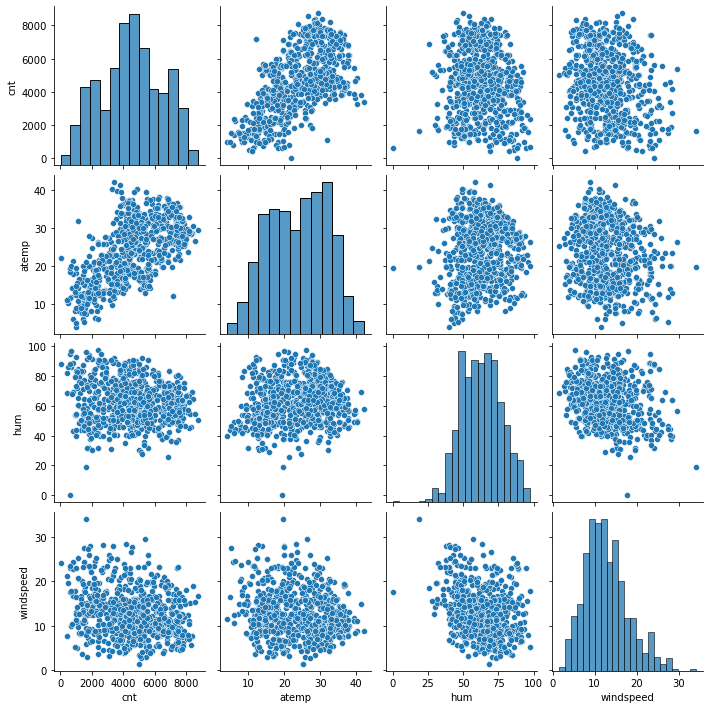

In [596]:
sns.pairplot(data=rent_bike,vars=['cnt', 'atemp', 'hum','windspeed'])
plt.show()

#### Visualising Categorical Variables



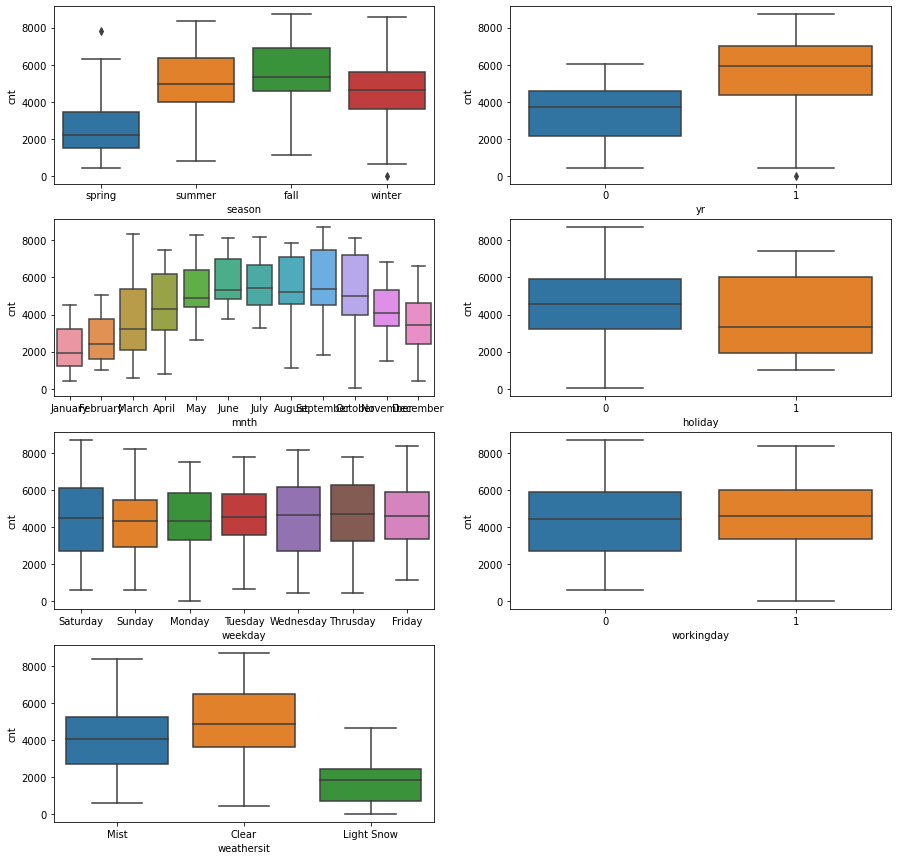

In [597]:
plt.figure(figsize=(15, 15))
#'season','yr','mnth','holiday','weekday','workingday','weathersit'
plt.subplot(4,2,1)
sns.boxplot(x = 'season', y = 'cnt', data = rent_bike)
plt.subplot(4,2,2)
sns.boxplot(x = 'yr', y = 'cnt', data = rent_bike)
plt.subplot(4,2,3)
sns.boxplot(x = 'mnth', y = 'cnt', data = rent_bike)
plt.subplot(4,2,4)
sns.boxplot(x = 'holiday', y = 'cnt', data = rent_bike)
plt.subplot(4,2,5)
sns.boxplot(x = 'weekday', y = 'cnt', data = rent_bike)
plt.subplot(4,2,6)
sns.boxplot(x = 'workingday', y = 'cnt', data = rent_bike)
plt.subplot(4,2,7)
sns.boxplot(x = 'weathersit', y = 'cnt', data = rent_bike)
plt.show()

## Step 3: Data Preparation
- Dummy Variables
- The variables 'mnth','season','weekday','weathersit' are having more than two levels. We need to convert these levels into integer.

In [598]:
# Get the dummy variables variables 'mnth','season','weekday','weathersit, and store it in a new variable - 'status'
dummy_var = ['mnth','season','weekday','weathersit']

In [599]:
status = pd.get_dummies(rent_bike[dummy_var], drop_first = True)
# Check what the dataset 'status' looks like
status.head()

,mnth_August,mnth_December,mnth_February,mnth_January,mnth_July,mnth_June,mnth_March,mnth_May,mnth_November,mnth_October,...,season_summer,season_winter,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thrusday,weekday_Tuesday,weekday_Wednesday,weathersit_Light Snow,weathersit_Mist
0,0,0,0,1,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
1,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
2,0,0,0,1,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
3,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [600]:
# Add the results to the original housing dataframe
rent_bike = pd.concat([rent_bike, status],axis=1)

In [601]:
# Now let's see the head of our dataframe.
rent_bike.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,atemp,hum,windspeed,...,season_summer,season_winter,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thrusday,weekday_Tuesday,weekday_Wednesday,weathersit_Light Snow,weathersit_Mist
0,spring,0,January,0,Saturday,0,Mist,18.18125,80.5833,10.749882,...,0,0,0,1,0,0,0,0,0,1
1,spring,0,January,0,Sunday,0,Mist,17.68695,69.6087,16.652113,...,0,0,0,0,1,0,0,0,0,1
2,spring,0,January,0,Monday,1,Clear,9.47025,43.7273,16.636703,...,0,0,1,0,0,0,0,0,0,0
3,spring,0,January,0,Tuesday,1,Clear,10.60610,59.0435,10.739832,...,0,0,0,0,0,0,1,0,0,0
4,spring,0,January,0,Wednesday,1,Clear,11.46350,43.6957,12.522300,...,0,0,0,0,0,0,0,1,0,0


In [602]:
# Drop 'mnth','season','weekday','weathersit' as we have created the dummies for it
rent_bike = rent_bike.drop(columns=dummy_var)
rent_bike.head()

,yr,holiday,workingday,atemp,hum,windspeed,cnt,mnth_August,mnth_December,mnth_February,...,season_summer,season_winter,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thrusday,weekday_Tuesday,weekday_Wednesday,weathersit_Light Snow,weathersit_Mist
0,0,0,0,18.18125,80.5833,10.749882,985,0,0,0,...,0,0,0,1,0,0,0,0,0,1
1,0,0,0,17.68695,69.6087,16.652113,801,0,0,0,...,0,0,0,0,1,0,0,0,0,1
2,0,0,1,9.47025,43.7273,16.636703,1349,0,0,0,...,0,0,1,0,0,0,0,0,0,0
3,0,0,1,10.60610,59.0435,10.739832,1562,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4,0,0,1,11.46350,43.6957,12.522300,1600,0,0,0,...,0,0,0,0,0,0,0,1,0,0


## Step 4: Splitting the Data into Training and Testing Sets
Performing a train-test split.

In [603]:
from sklearn.model_selection import train_test_split
# We specify this so that the train and test data set always have the same rows, respectively
np.random.seed(0)
#df_train, df_test = train_test_split(rent_bike, train_size = 0.7, test_size = 0.3, random_state = 100)
df_train, df_test = train_test_split(rent_bike, train_size = 0.7, test_size = 0.3, random_state = 100)

In [604]:
rent_bike.shape

(730, 29)

In [605]:
df_train.shape

(510, 29)

In [606]:
df_test.shape

(219, 29)

### Rescaling the Features
using MinMax scaling

In [607]:
from sklearn.preprocessing import MinMaxScaler

In [608]:
scaler = MinMaxScaler()

In [609]:
# Apply scaler() to all the columns except the columns having values '0 & 1' and 'dummy' variables
num_vars = ['atemp', 'hum', 'windspeed','cnt']

df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

In [610]:
df_train.head()

,yr,holiday,workingday,atemp,hum,windspeed,cnt,mnth_August,mnth_December,mnth_February,...,season_summer,season_winter,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thrusday,weekday_Tuesday,weekday_Wednesday,weathersit_Light Snow,weathersit_Mist
653,1,0,1,0.501133,0.575354,0.300794,0.864243,0,0,0,...,0,1,0,0,0,0,1,0,0,0
576,1,0,1,0.766351,0.725633,0.264686,0.827658,0,0,0,...,0,0,0,0,0,0,1,0,0,0
426,1,0,0,0.438975,0.640189,0.255342,0.465255,0,0,0,...,0,0,0,1,0,0,0,0,0,1
728,1,0,0,0.200348,0.498067,0.663106,0.204096,0,1,0,...,0,0,0,0,1,0,0,0,0,0
482,1,0,0,0.391735,0.504508,0.188475,0.482973,0,0,0,...,1,0,0,1,0,0,0,0,0,1


In [611]:
df_train.describe()

,yr,holiday,workingday,atemp,hum,windspeed,cnt,mnth_August,mnth_December,mnth_February,...,season_summer,season_winter,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thrusday,weekday_Tuesday,weekday_Wednesday,weathersit_Light Snow,weathersit_Mist
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,...,510.000000,510.00000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.507843,0.025490,0.676471,0.512989,0.650369,0.320768,0.513620,0.096078,0.084314,0.066667,...,0.245098,0.24902,0.150980,0.154902,0.143137,0.133333,0.131373,0.158824,0.029412,0.343137
std,0.500429,0.157763,0.468282,0.212385,0.145882,0.169797,0.224593,0.294988,0.278131,0.249689,...,0.430568,0.43287,0.358381,0.362166,0.350557,0.340268,0.338139,0.365870,0.169124,0.475223
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.332086,0.538643,0.199179,0.356420,0.000000,0.000000,0.000000,...,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.526811,0.653714,0.296763,0.518638,0.000000,0.000000,0.000000,...,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.688457,0.754830,0.414447,0.684710,0.000000,0.000000,0.000000,...,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### Defining Target & Feature Variables
1. Fixing Trained Target Variable

In [613]:
y_train = df_train.pop('cnt')

2. Fixing Trained Features Variable

In [614]:
X_train = df_train

### Step 5: Building a linear model
- Using the Linear Regression function from SciKit Learn for its compatibility with RFE (which is a utility from sklearn)

- RFE - Recursive feature elimination

In [615]:
# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [616]:
# Running RFE with the output number of the variable equal to 15
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, 15)             # running RFE
rfe = rfe.fit(X_train, y_train)

In [617]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', False, 2),
 ('atemp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('mnth_August', False, 6),
 ('mnth_December', True, 1),
 ('mnth_February', False, 3),
 ('mnth_January', True, 1),
 ('mnth_July', True, 1),
 ('mnth_June', False, 7),
 ('mnth_March', False, 14),
 ('mnth_May', False, 4),
 ('mnth_November', True, 1),
 ('mnth_October', False, 13),
 ('mnth_September', True, 1),
 ('season_spring', True, 1),
 ('season_summer', False, 5),
 ('season_winter', True, 1),
 ('weekday_Monday', False, 9),
 ('weekday_Saturday', True, 1),
 ('weekday_Sunday', False, 8),
 ('weekday_Thrusday', False, 11),
 ('weekday_Tuesday', False, 10),
 ('weekday_Wednesday', False, 12),
 ('weathersit_Light Snow', True, 1),
 ('weathersit_Mist', True, 1)]

In [618]:
col = X_train.columns[rfe.support_]
col

Index(['yr', 'holiday', 'atemp', 'hum', 'windspeed', 'mnth_December',
       'mnth_January', 'mnth_July', 'mnth_November', 'mnth_September',
       'season_spring', 'season_winter', 'weekday_Saturday',
       'weathersit_Light Snow', 'weathersit_Mist'],
      dtype='object')

In [619]:
X_train.columns[~rfe.support_]

Index(['workingday', 'mnth_August', 'mnth_February', 'mnth_June', 'mnth_March',
       'mnth_May', 'mnth_October', 'season_summer', 'weekday_Monday',
       'weekday_Sunday', 'weekday_Thrusday', 'weekday_Tuesday',
       'weekday_Wednesday'],
      dtype='object')

### Building model using statsmodel, for the detailed statistics
#### 1st Building model

In [620]:
# Creating X_test dataframe with RFE selected variables
X_train_rfe = X_train[col]

In [621]:
# Adding a constant variable 
import statsmodels.api as sm  
X_train_rfe_const = sm.add_constant(X_train_rfe)

In [622]:
lm_1 = sm.OLS(y_train,X_train_rfe_const).fit()   # Running the linear model

In [623]:
#Let's see the summary of our linear model
lm_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.842
Model:                            OLS   Adj. R-squared:                  0.837
Method:                 Least Squares   F-statistic:                     175.4
Date:                Wed, 02 Jun 2021   Prob (F-statistic):          9.67e-187
Time:                        23:29:32   Log-Likelihood:                 508.84
No. Observations:                 510   AIC:                            -985.7
Df Residuals:                     494   BIC:                            -917.9
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.3662      0.032     11.425      0.000       0.303       0.429
yr                        0.2326      0.008     28.490      0.000       0.217       0.249
holiday                  -0.0841      0.026     -3.243      0.001      -0.135      -0.033
atemp                     0.4470      0.035     12.826      0.000       0.379       0.515
hum                      -0.1477      0.038     -3.874      0.000      -0.223      -0.073
windspeed                -0.1692      0.026     -6.498      0.000      -0.220      -0.118
mnth_December            -0.0485      0.017     -2.791      0.005      -0.083      -0.014
mnth_January             -0.0515      0.018     -2.836      0.005      -0.087      -0.016
mnth_July                -0.0679      0.017     -3.935      0.000      -0.102      -0.034
mnth_November            -0.0502      0.019     -2.689      0.007      -0.087      -0.014
mnth_September            0.0586      0.016      3.751      0.000       0.028       0.089
season_spring            -0.1070      0.015     -6.974      0.000      -0.137      -0.077
season_winter             0.0662      0.014      4.703      0.000       0.039       0.094
weekday_Saturday          0.0182      0.011      1.627      0.104      -0.004       0.040
weathersit_Light Snow    -0.2504      0.027     -9.381      0.000      -0.303      -0.198
weathersit_Mist          -0.0582      0.011     -5.501      0.000      -0.079      -0.037
==============================================================================
Omnibus:                       73.887   Durbin-Watson:                   1.993
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              193.568
Skew:                          -0.724   Prob(JB):                     9.28e-43
Kurtosis:                       5.648   Cond. No.                         18.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [624]:
# Calculate the VIFs for the 1st model
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,hum,25.08
2,atemp,16.88
4,windspeed,4.03
11,season_winter,2.93
10,season_spring,2.89
14,weathersit_Mist,2.26
0,yr,2.06
8,mnth_November,1.82
6,mnth_January,1.75
5,mnth_December,1.54


#### From the above result, we can see that the p-value of all the features are under within considered limit (< 0.05). 
#### Lets check the VIF table, VIF value of variable 'hum' is more than the considered value (> 5).
#### So lets drop this feature 'hum' & re-build the model.
#### 2nd Building model

In [625]:
col = col.drop(['hum'])
X_train_rfe = X_train[col] 
X_train_rfe_const = sm.add_constant(X_train_rfe)
lm_2 = sm.OLS(y_train,X_train_rfe_const).fit()
lm_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.837
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     181.7
Date:                Wed, 02 Jun 2021   Prob (F-statistic):          1.10e-184
Time:                        23:29:32   Log-Likelihood:                 501.21
No. Observations:                 510   AIC:                            -972.4
Df Residuals:                     495   BIC:                            -908.9
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.2902      0.026     11.288      0.000       0.240       0.341
yr                        0.2362      0.008     28.711      0.000       0.220       0.252
holiday                  -0.0847      0.026     -3.222      0.001      -0.136      -0.033
atemp                     0.4125      0.034     12.073      0.000       0.345       0.480
windspeed                -0.1441      0.026     -5.636      0.000      -0.194      -0.094
mnth_December            -0.0541      0.018     -3.083      0.002      -0.089      -0.020
mnth_January             -0.0568      0.018     -3.090      0.002      -0.093      -0.021
mnth_July                -0.0603      0.017     -3.471      0.001      -0.094      -0.026
mnth_November            -0.0497      0.019     -2.624      0.009      -0.087      -0.012
mnth_September            0.0553      0.016      3.501      0.001       0.024       0.086
season_spring            -0.1096      0.016     -7.050      0.000      -0.140      -0.079
season_winter             0.0577      0.014      4.095      0.000       0.030       0.085
weekday_Saturday          0.0205      0.011      1.814      0.070      -0.002       0.043
weathersit_Light Snow    -0.2917      0.025    -11.756      0.000      -0.340      -0.243
weathersit_Mist          -0.0819      0.009     -9.329      0.000      -0.099      -0.065
==============================================================================
Omnibus:                       77.462   Durbin-Watson:                   1.994
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              200.699
Skew:                          -0.762   Prob(JB):                     2.62e-44
Kurtosis:                       5.669   Cond. No.                         15.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [626]:
# Calculate the VIFs for the 2nd model
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,atemp,4.61
3,windspeed,3.98
10,season_winter,2.55
9,season_spring,2.36
0,yr,2.06
7,mnth_November,1.80
5,mnth_January,1.65
13,weathersit_Mist,1.53
4,mnth_December,1.46
6,mnth_July,1.35


#### From the above result, we can see that the p-value of features 'weekday_Saturday" is more than 0.05) 
#### So lets drop this feature 'weekday_Saturday' & re-build the model.
#### 3nd Building model

In [627]:
col = col.drop(['weekday_Saturday'])
X_train_rfe = X_train[col] 
X_train_rfe_const = sm.add_constant(X_train_rfe)
lm_3 = sm.OLS(y_train,X_train_rfe_const).fit()
lm_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.836
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     194.5
Date:                Wed, 02 Jun 2021   Prob (F-statistic):          3.95e-185
Time:                        23:29:33   Log-Likelihood:                 499.52
No. Observations:                 510   AIC:                            -971.0
Df Residuals:                     496   BIC:                            -911.8
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.2931      0.026     11.396      0.000       0.243       0.344
yr                        0.2357      0.008     28.604      0.000       0.220       0.252
holiday                  -0.0881      0.026     -3.349      0.001      -0.140      -0.036
atemp                     0.4117      0.034     12.022      0.000       0.344       0.479
windspeed                -0.1418      0.026     -5.540      0.000      -0.192      -0.092
mnth_December            -0.0531      0.018     -3.020      0.003      -0.088      -0.019
mnth_January             -0.0562      0.018     -3.053      0.002      -0.092      -0.020
mnth_July                -0.0598      0.017     -3.432      0.001      -0.094      -0.026
mnth_November            -0.0501      0.019     -2.640      0.009      -0.087      -0.013
mnth_September            0.0557      0.016      3.514      0.000       0.025       0.087
season_spring            -0.1096      0.016     -7.036      0.000      -0.140      -0.079
season_winter             0.0580      0.014      4.110      0.000       0.030       0.086
weathersit_Light Snow    -0.2912      0.025    -11.708      0.000      -0.340      -0.242
weathersit_Mist          -0.0817      0.009     -9.296      0.000      -0.099      -0.064
==============================================================================
Omnibus:                       71.564   Durbin-Watson:                   1.993
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              193.324
Skew:                          -0.692   Prob(JB):                     1.05e-42
Kurtosis:                       5.680   Cond. No.                         15.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [628]:
# Calculate the VIFs for the 3rd model
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,atemp,4.57
3,windspeed,3.95
10,season_winter,2.55
9,season_spring,2.35
0,yr,2.06
7,mnth_November,1.80
5,mnth_January,1.65
12,weathersit_Mist,1.53
4,mnth_December,1.46
6,mnth_July,1.35


### Now as we can see, the VIFs and p-values both are within an acceptable range. So we go ahead and make our predictions using this model only.

## Step 6:  Residual Analysis of the train data

#### 1. Normality of Error term

In [629]:
y_train_pred = lm_3.predict(X_train_rfe_const)

Text(0.5, 0, 'Errors')

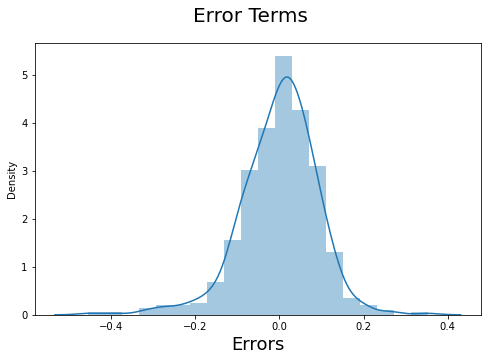

In [630]:
# Plot the histogram of the error terms
fig = plt.figure(figsize=[8,5])
sns.distplot((y_train - y_train_pred), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                         # X-label

### From the above graph, we can conclude that the errors are Normally distributed.

#### 2. Independence of Errors

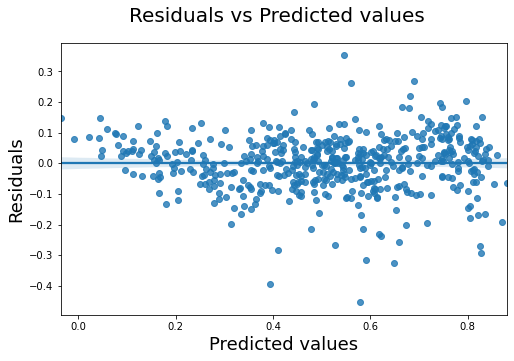

In [631]:
fig = plt.figure(figsize=[8,5])
sns.regplot(x=y_train_pred, y=y_train - y_train_pred)
fig.suptitle('Residuals vs Predicted values', fontsize = 20)                  
plt.xlabel('Predicted values', fontsize = 18)                      
plt.ylabel('Residuals', fontsize = 18)
plt.show()

### From the above graph, we can conclude that the there is absolutely no relation between residual & predicted values.

## Step 8:  Making Predictions Using the Final Model
Applying the scaling on the test sets

In [632]:
df_test[num_vars] = scaler.transform(df_test[num_vars])

In [633]:
df_test.describe()

,yr,holiday,workingday,atemp,hum,windspeed,cnt,mnth_August,mnth_December,mnth_February,...,season_summer,season_winter,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thrusday,weekday_Tuesday,weekday_Wednesday,weathersit_Light Snow,weathersit_Mist
count,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,...,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000
mean,0.479452,0.036530,0.698630,0.532991,0.638508,0.313350,0.520592,0.059361,0.086758,0.100457,...,0.264840,0.232877,0.127854,0.118721,0.146119,0.164384,0.164384,0.100457,0.027397,0.319635
std,0.500722,0.188034,0.459904,0.217888,0.148974,0.159947,0.218435,0.236840,0.282125,0.301297,...,0.442259,0.423633,0.334692,0.324202,0.354034,0.371472,0.371472,0.301297,0.163612,0.467403
min,0.000000,0.000000,0.000000,0.025950,0.261915,-0.042808,0.048205,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.344751,0.527265,0.198517,0.377531,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,0.549198,0.627737,0.299459,0.524275,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.714132,0.743928,0.403048,0.672745,0.000000,0.000000,0.000000,...,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,0.980934,1.002146,0.807474,0.963300,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


#### Fixing Test Target Variable

In [634]:
y_test = df_test.pop('cnt')

#### Fixing Test Feature Variable

In [635]:
X_test = df_test

In [636]:
# Creating X_test_m5 dataframe by dropping variables from X_test
X_test_m3 = X_test[X_train_rfe.columns]

In [637]:
# Adding constant variable to test dataframe
X_test_m3 = sm.add_constant(X_test_m3)

In [638]:
# Making predictions using the third model
y_pred_m3 = lm_3.predict(X_test_m3)

## Step 9: Model Evaluation

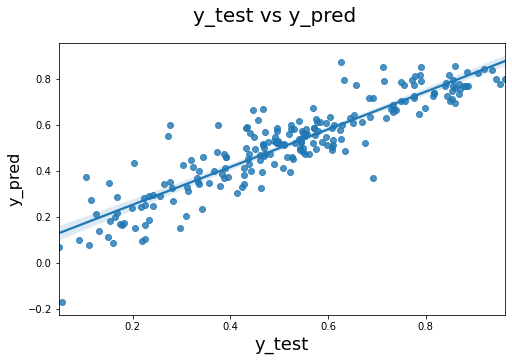

In [639]:
# Plotting y_test and y_pred_m5 to understand the spread.
fig = plt.figure(figsize=[8,5])
#plt.scatter(y_test,y_pred_m5)
sns.regplot(x=y_test, y=y_pred_m3)
fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16)                          # Y-label
plt.show()

### From the above graph, we can conclude that there is Linear Relationship between actual data & predicted data points.

## Step 10: R-squared score on the test set

In [640]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred_m3)

0.8179669424739717